In [1]:
import requests
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
list_capteurs = ['C45BBE384CD2', 'C45BBE386362', 'C45BBE386952', 'C45BBE39F56A', 'C45BBE39F9AE', 'A8032A31204E', 'C45BBE37B346']
list_capteurs_dist = {'C45BBE384CD2' : 89, 'C45BBE386362' : 80, 'C45BBE386952' : 65, 'C45BBE39F56A' : 56, 'C45BBE39F9AE' : 13, 'A8032A31204E' : 29, 'C45BBE37B346' : 52}

In [3]:
'''
Dans cette fonction on prend en entrée une limite de rssi et la liste des capteurs avec 
leur position dans le couloir.
On calcule pour chaque metre la moyenne des positions des capteurs qui captent entre le maximum
de rssi enregistré et le max moins la limite.
On retourne ensuite une liste de chacune de ces positions pour chaque metre
'''
def Position_methode_2(limit, list_capteurs):
    L = []
    for metre in range(91):
        M = []
        for capteur in list_capteurs:
            try:
                df = pd.DataFrame(pd.read_csv('../Selected/'+capteur+'.csv')[str(metre)])
            except:
                continue
            for index, row in df.iterrows():
                for col in df:
                    if row[0]>=df[col].max()-limit:
                        M.append(capteur)
        distance = 0
        if M != []:
            for i in range(len(M)):
                distance += list_capteurs_dist[M[i]]
            L.append(distance/len(M))
    return L

In [4]:
y = Position_methode_2(1, list_capteurs)

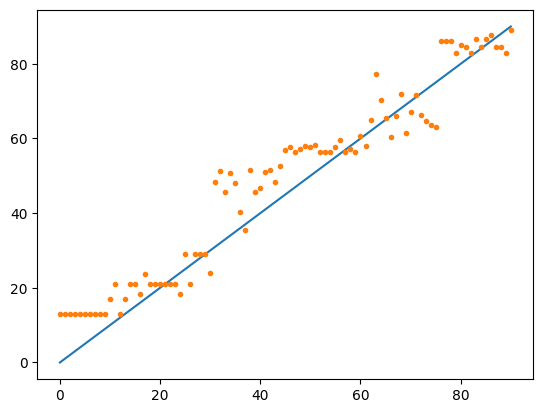

In [5]:
x = [i for i in range(91)]
plt.plot(x)
plt.plot(y, '.')

## Régression Linéaire

In [6]:
import statsmodels.api as sm
import numpy as np
plt.rcParams['figure.figsize'] = (12, 6)

In [7]:
X = np.column_stack((x))
X=X.transpose()
X = sm.add_constant(X)
model = sm.OLS(y,X)
results = model.fit()

Text(0, 0.5, 'position estimée')

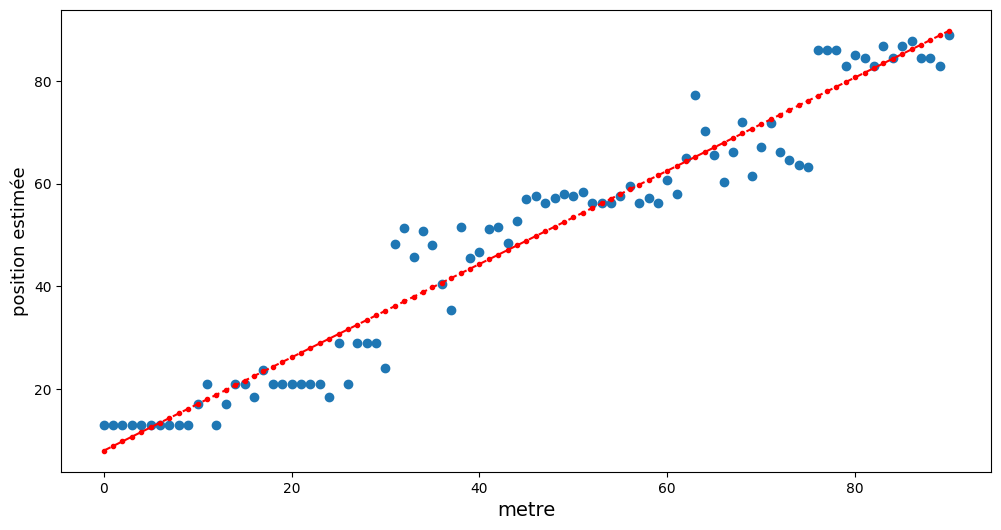

In [8]:
plt.plot(x, y, 'o', label="données")
plt.plot(x, results.fittedvalues, 'r--.', label="droite de régression")
plt.xlabel("metre",fontsize=14); 
plt.ylabel('position estimée',fontsize=13)

In [9]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.944
Model:                            OLS   Adj. R-squared:                  0.944
Method:                 Least Squares   F-statistic:                     1510.
Date:                Thu, 05 Jan 2023   Prob (F-statistic):           1.29e-57
Time:                        22:18:08   Log-Likelihood:                -289.08
No. Observations:                  91   AIC:                             582.2
Df Residuals:                      89   BIC:                             587.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.9283      1.219      6.502      0.0

In [10]:
print('Paramètres de la régression: ', results.params)
print('R2: ', results.rsquared)
print('s: ', np.sqrt(results.mse_resid))
print('intervalles de confiance b0 95% : ', results.conf_int(.05)[0])
print('intervalles de confiance b1 95% : ', results.conf_int(.05)[1])

Paramètres de la régression:  [7.92834764 0.90949823]
R2:  0.9443513784451137
s:  5.864250226097009
intervalles de confiance b0 95% :  [ 5.50539246 10.35130281]
intervalles de confiance b1 95% :  [0.86299743 0.95599904]


$b_0$ devrait être égal à 0, il vaut 7.93 avec un intervalle de confiance de [5.51; 10.35]

$b_1$ devrait être égal à 1, il vaut 0.91 avec un intervalle de confiance de [0.86; 0.96]

# Faible variance mais biais important !